In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dlr = pd.read_csv(r'/Users/andrelimon/Desktop/Raymond James Firm Day/DLR.csv', index_col = 'Date')

In [3]:
eqix = pd.read_csv(r'/Users/andrelimon/Desktop/Raymond James Firm Day/EQIX.csv', index_col = 'Date')

In [4]:
eqix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, 2015-08-24 to 2020-08-24
Data columns (total 1 columns):
Adj Close    262 non-null float64
dtypes: float64(1)
memory usage: 4.1+ KB


In [5]:
stocks = pd.concat([dlr,eqix], axis=1)
stocks.columns = ['dlr','eqix']


In [6]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,dlr,eqix
Date,,
2015-08-24,NaN,NaN
2015-08-31,-0.044990,0.010333
2015-09-07,-0.007105,0.070592
2015-09-14,0.061485,-0.014292
2015-09-21,-0.011500,-0.021991


In [7]:
np.random.seed(42)
num_ports = 6000
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(2))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (log_ret.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [8]:
print('Max Sharpe Ratio in the array: {}'.format(sharpe_arr.max()))
print('Its location in the array: {}'.format(sharpe_arr.argmax()))

Max Sharpe Ratio in the array: 2.204233026844299
Its location in the array: 3749


In [9]:
print(all_weights[79,:])

max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]


[0.24603881 0.75396119]


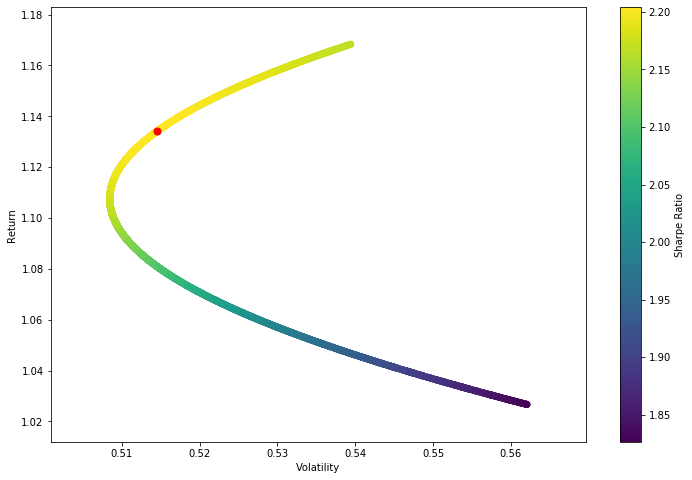

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret, c='red',s=50)
plt.show()